In [36]:
import matplotlib
import matplotlib.pyplot as plt
import pysam
import pandas as pd
import numpy as np
import os
import collections
import ast
from pygenomeviz import GenomeViz

# Import DataFrames

In [37]:
drbList = []
for file in os.listdir('/home/mark/Desktop/HLA/DRB/DataFrames/full/'):
    print(file)
    tempDF = pd.read_csv('/home/mark/Desktop/HLA/DRB/DataFrames/full/'+str(file))
    for row in tempDF.index:
        drbList.append([x for x in tempDF.loc[row]])

NA20847.hap2.csv
HG00358.hap2.csv
HG02953.hap2.csv
HG02554.hap2.csv
HG01114.hap2.csv
HG02059.hap1.csv
HG00514.hap1.csv
HG01596.hap1.csv
NA18939.hap2.csv
NA19129.hap1.csv
NA19331.hap1.csv
HG03065.hap2.csv
NA19705.hap1.csv
HG03456.hap2.csv
HG00358.hap1.csv
NA19317.hap1.csv
HG03807.hap1.csv
NA19240.hap1.csv
HG03371.hap2.csv
HG01573.hap1.csv
HG02769.hap1.csv
NA18989.hap1.csv
HG00096.hap1.csv
HG01596.hap2.csv
HG00512.hap2.csv
HG04036.hap1.csv
NA20509.hap2.csv
NA12329.hap1.csv
HG02587.hap1.csv
NA18989.hap2.csv
NA19239.hap1.csv
HG03732.hap2.csv
hg38.hap6.csv
HG01114.hap1.csv
HG04217.hap1.csv
NA24385.hap1.csv
HG02769.hap2.csv
HG02011.hap1.csv
HG04217.hap2.csv
chm13.hap1.csv
NA19384.hap2.csv
HG03248.hap1.csv
NA19036.hap2.csv
HG00864.hap1.csv
HG03520.hap1.csv
NA19836.hap1.csv
HG03009.hap1.csv
HG00514.hap2.csv
HG02059.hap2.csv
NA19650.hap2.csv
NA20355.hap1.csv
NA20847.hap1.csv
HG01352.hap1.csv
HG02106.hap1.csv
HG02666.hap2.csv
HG02953.hap1.csv
HG03683.hap2.csv
NA19347.hap2.csv
NA18534.hap1.csv
HG

In [38]:
DRB_DF1 = pd.DataFrame(data=drbList)

In [39]:
DRB_DF1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NA20847.hap2_4318694_MIRb,42.0,33.3,6.1,0.0,NA20847.hap2,4318694,4318891,(1781957),+,MIRb,SINE/MIR,10,219.0,(49),7116.0,4318206,488,NaN,NaN
1,NA20847.hap2_4319056_AluSc,327.0,8.8,0.3,0.0,NA20847.hap2,4319056,4319352,(1781496),+,AluSc,SINE/Alu,1,298.0,(11),7117.0,4318206,850,NaN,NaN
2,NA20847.hap2_4319558_AluY,343.0,5.8,0.0,2.3,NA20847.hap2,4319558,4319870,(1780978),+,AluY,SINE/Alu,1,306.0,(5),7118.0,4318206,1352,NaN,NaN
3,NA20847.hap2_4319880_L1MC2,668.0,18.3,4.0,0.7,NA20847.hap2,4319880,4320719,(1780129),C,L1MC2,LINE/L1,(10),6334.0,5467,7119.0,4318206,1674,NaN,NaN
4,NA20847.hap2_4320739_L1MD2,439.0,21.0,11.8,2.7,NA20847.hap2,4320739,4321444,(1779404),C,L1MD2,LINE/L1,(15),6344.0,5577,7120.0,4318206,2533,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48516,NA12329.hap2_4585462_AluSg7,217.0,8.7,19.5,0.7,NA12329.hap2,4585462,4585702,(1533005),+,AluSg7,SINE/Alu,12,297.0,(12),7539.0,4309952,275510,NaN,NaN
48517,NA12329.hap2_4586217_MIR,43.0,32.0,1.0,0.0,NA12329.hap2,4586217,4586313,(1532394),+,MIR,SINE/MIR,58,155.0,(107),7540.0,4309952,276265,NaN,NaN
48518,NA12329.hap2_4586402_MER90a,69.0,21.1,2.3,0.0,NA12329.hap2,4586402,4586529,(1532178),C,MER90a,LTR/ERV1,(2),612.0,482,7541.0,4309952,276450,NaN,NaN
48519,NA12329.hap2_4586530_MLT2C1,225.0,23.4,4.5,6.1,NA12329.hap2,4586530,4586911,(1531796),C,MLT2C1,LTR/ERVL,(18),379.0,4,7542.0,4309952,276578,NaN,NaN


In [40]:
import ast
goodRows =[]
for row in DRB_DF1.index:
    if 'DRB' in str(DRB_DF1.at[row,18]):
        goodRows.append(row)
        DRB_DF1.at[row,11] = ast.literal_eval(DRB_DF1.at[row,18]).strip()
        if '+' in str(DRB_DF1.at[row,9]):
            DRB_DF1.at[row,10] = str(ast.literal_eval(DRB_DF1.at[row,18]).strip())+"->_"+str(ast.literal_eval(DRB_DF1.at[row,19]).strip())
        else:
            DRB_DF1.at[row,10] = "<-"+str(ast.literal_eval(DRB_DF1.at[row,18]).strip())+"_"+str(ast.literal_eval(DRB_DF1.at[row,19]).strip())

    else:
        if DRB_DF1.at[row,2]<=50.0:
            goodRows.append(row)
        else:
            continue
DRB_DF2=DRB_DF1.loc[goodRows].copy()

In [41]:
pDF1 = pd.read_csv('/home/mark/Desktop/HLA/DRB/DRB_PseudoGene_RM_ReWork2024-03-27-2024.csv').drop(columns=['Unnamed: 0'])
for row in pDF1.index:
    if pDF1.at[row,'8']=='HLA-DRB6-202_lncR_EXON_6':
        pDF1.at[row,'14']='Gene'
    else:
        continue
pDF  = pDF1[pDF1['14']=='Gene'].copy()

In [42]:
mydrbList=[]
for row in DRB_DF2.index:
    mydrbList.append([x for x in DRB_DF2.loc[row]])
    
for row in pDF.index:
    row0 = 'placeholder'
    row1 = 'placeholder1'
    row2 = pDF.at[row,'1']
    row3 = pDF.at[row,'2']
    row4 = pDF.at[row,'3']
    row5 = pDF.at[row,'4']
    row6 = pDF.at[row,'5']
    row7 = pDF.at[row,'6']
    row8 = 'placeholder'
    if pDF.at[row,'7'] =='C':
        row9='-'
        row10 = '<-HLA-'+str(pDF.at[row,'8'].split("-")[1])+'_'+str(pDF.at[row,'8'].split("_")[-1])
    else:
        row9='+'
        row10 = 'HLA-'+str(pDF.at[row,'8'].split("-")[1])+'_'+str(pDF.at[row,'8'].split("_")[-1])+"->"
        
        
    row11 = 'HLA-'+str(pDF.at[row,'8'].split("-")[1])
    row12 = 'placeholder'
    row13 = 'placeholder'
    row14 = 'placeholder'
    row15 = 'placeholder'

    mydrbList.append([row0,row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12,row13,row14,row15,row14,row14,row14,row14])

In [43]:
DRB_DF = pd.DataFrame(data=mydrbList).sort_values(by=[6,5])
#DRB_DF = pd.DataFrame(data=mydrbList).sort_values(by=[6,5])
DRB_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
39654,hg38.hap8_3668839_MIRb,42.0,33.3,6.1,0.0,hg38.hap8,3668839,3669036,(937352),+,MIRb,SINE/MIR,10,219.0,(49),5719.0,3668351,488,NaN,NaN
39655,hg38.hap8_3669201_AluSc,327.0,8.8,0.3,0.0,hg38.hap8,3669201,3669497,(936891),+,AluSc,SINE/Alu,1,298.0,(11),5720.0,3668351,850,NaN,NaN
39656,hg38.hap8_3669703_AluY,344.0,5.7,0.0,2.3,hg38.hap8,3669703,3670016,(936372),+,AluY,SINE/Alu,1,307.0,(4),5721.0,3668351,1352,NaN,NaN
39657,hg38.hap8_3670019_L1MC2,669.0,18.2,4.0,1.6,hg38.hap8,3670019,3670871,(935517),C,L1MC2,LINE/L1,(5),6339.0,5467,5722.0,3668351,1668,NaN,NaN
39658,hg38.hap8_3670891_L1MD2,440.0,21.0,11.8,2.7,hg38.hap8,3670891,3671596,(934792),C,L1MD2,LINE/L1,(15),6344.0,5577,5723.0,3668351,2540,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35324,HG03248.hap2_4689492_AluSg7,217.0,8.7,19.5,0.7,HG03248.hap2,4689492,4689732,(1549881),+,AluSg7,SINE/Alu,12,297.0,(12),7697.0,4411787,277705,NaN,NaN
35325,HG03248.hap2_4690247_MIR,43.0,32.0,1.0,0.0,HG03248.hap2,4690247,4690343,(1549270),+,MIR,SINE/MIR,58,155.0,(107),7698.0,4411787,278460,NaN,NaN
35326,HG03248.hap2_4690432_MER90a,69.0,21.1,2.3,0.0,HG03248.hap2,4690432,4690559,(1549054),C,MER90a,LTR/ERV1,(2),612.0,482,7699.0,4411787,278645,NaN,NaN
35327,HG03248.hap2_4690560_MLT2C1,225.0,23.4,4.5,6.1,HG03248.hap2,4690560,4690941,(1548672),C,MLT2C1,LTR/ERVL,(18),379.0,4,7700.0,4411787,278773,NaN,NaN


# Start Visualization

In [45]:
ColorDict = {
 'HLA-DRB2':'cyan',
 'HLA-DRB6':'cyan',
 'HLA-DRB7':'cyan',
 'HLA-DRB8':'cyan',
 'HLA-DRB9':'cyan',  
 'HLA-DRB1':'Magenta',
 'HLA-DRB3':'Magenta',
 'HLA-DRB4':'Magenta',
 'HLA-DRB5':'Magenta',
 'DNA/TcMar-Mariner':'blue',
 'DNA/TcMar-Tigger':'blue',
 'DNA/hAT-Blackjack':'blue',
 'DNA/hAT-Charlie':'blue',
 'DNA/hAT-Tip100':'blue',
 'LINE/CR1':'darkgreen',
 'LINE/L2':'green',
 'LINE/L1':'lime',
 'LTR/ERVK':'orange',
 'LTR/ERV1':'orange',
 'LTR/ERVL':'orange',
 'LTR/ERVL-MaLR':'orange',
 'Low_complexity':'brown',
 'Retroposon/SVA':'yellow',
 'SINE/MIR':'darkred',
 'SINE/Alu':'red',
 'snRNA':'silver',
 'Simple_repeat':"brown",
 
}

In [46]:
DRB_DF['Color']=[ColorDict[x] for x in DRB_DF[11]]

In [47]:
len(set(DRB_DF[5]))

137

In [48]:
DRB_DF['Insertion_Distance']='temp'

for sample in set([x for x in DRB_DF[5]]):
    tempDF = DRB_DF[DRB_DF[5]==sample].copy()
    tempDF[6]= tempDF[6].astype(int)
    tempDF[7]= tempDF[7].astype(int)
    start = int(min(tempDF[6]))
    
    for row in tempDF.index:
        DRB_DF.at[row,'Insertion_Distance']= (int(tempDF.at[row,6])-start)+10

In [49]:
lengths=[]
for row in DRB_DF.index:
    lengths.append((int(DRB_DF.at[row,7]) - int(DRB_DF.at[row,6]))+1)
DRB_DF['Length']= lengths

In [50]:
genome_list = {}
for sample in set(DRB_DF[5]):
    
    tempDF = DRB_DF[DRB_DF[5]==sample].copy()
    tempDF[6]= tempDF[6].astype(int)
    tempDF[7]= tempDF[7].astype(int)

    size = abs(min(tempDF[6])-max(tempDF[7]))

    genome_list[sample]={'name':sample, 'size':size+20, 'cds_list':[]}
    
    for item in tempDF.index:
        start = int(tempDF.at[item,'Insertion_Distance'])
        end = int(tempDF.at[item,'Insertion_Distance'])+int(tempDF.at[item,'Length'])
        if tempDF.at[item,9] == '+':
            strand = 1
        else:
            strand = -1
        genome_list[sample]['cds_list'].append([start, end, strand, str(tempDF.at[item,10]), str(str(tempDF.at[item,'Color']))])

In [51]:
genome_list['HG02666.hap1']

{'name': 'HG02666.hap1',
 'size': 171215,
 'cds_list': [[10, 208, 1, 'MIRb', 'darkred'],
  [372, 670, 1, 'AluSc', 'red'],
  [875, 1189, 1, 'AluY', 'red'],
  [1199, 2039, -1, 'L1MC2', 'lime'],
  [2058, 2762, -1, 'L1MD2', 'lime'],
  [2764, 2865, 1, 'AluJr', 'red'],
  [2866, 3159, -1, 'AluSc', 'red'],
  [3159, 3342, 1, 'AluJr', 'red'],
  [3346, 3812, 1, 'GA-rich', 'brown'],
  [3830, 3859, -1, 'L1PREC2', 'lime'],
  [3863, 4187, -1, 'AluSx', 'red'],
  [4187, 6286, -1, 'L1PREC2', 'lime'],
  [6286, 6640, 1, 'THE1B', 'orange'],
  [6641, 7229, 1, 'THE1B', 'orange'],
  [7232, 7526, -1, 'AluY', 'red'],
  [7526, 8504, 1, 'THE1B', 'orange'],
  [8504, 8861, 1, 'THE1B', 'orange'],
  [8874, 9447, 1, 'L1PA15', 'lime'],
  [9448, 9726, 1, 'AluSc', 'red'],
  [9730, 9876, 1, 'L1PA15', 'lime'],
  [9878, 10043, -1, 'AluSc8', 'red'],
  [10043, 10079, 1, '(T)n', 'brown'],
  [10079, 10197, -1, 'AluSc8', 'red'],
  [10197, 11334, 1, 'L1PA15', 'lime'],
  [11334, 11762, 1, 'MER83', 'orange'],
  [11762, 12367, 1, 'L

In [52]:
import json
#with open('/home/mark/Desktop/HLA/DRB/DRB_typingDiction.json', 'w') as fp:
#    json.dump(genome_list, fp)

In [53]:
import json
def js_r(filename: str):
    with open(filename) as f_in:
        return json.load(f_in)
my_sample_data = js_r('/home/mark/Desktop/HLA/Globus/sample_hap_HLA_Sequence_Dictionary.json')
sampleList = ['chm13.hap1','hg38.hap1']
for x in my_sample_data.keys():
    if 'unassigned' in x:
        continue
    else:
        sampleList.append(str(x.split(".")[0])+".hap"+str(x.split("hap")[1].split(".")[0]))
sampleList2 = sorted(sampleList)
metaData = pd.read_csv('/home/mark/Desktop/HLA/Globus/hgsvc_samples.tsv', sep='\t')
metaData.sort_values(by=['population'])
sampleList3 = ['chm13.hap1','hg38.hap1']
for x in metaData.sort_values(by=['population'])['sample']:
    if str(x)+".hap1" in sampleList2:
        sampleList3.append(str(x)+".hap1")
        sampleList3.append(str(x)+".hap2")
    else:
        continue

In [54]:
#I removed these because NNNNNNNNs where in this region
sampleList3.remove('NA18939.hap1')
sampleList3.remove('NA18939.hap2')

In [55]:
print(len(sampleList3))

130


In [56]:
drbGroup={}
for sample in set(DRB_DF[5]):
    tempDF = DRB_DF[DRB_DF[5]==sample].copy()
    group = '_'.join(set(sorted([x.split("-")[2].split("_")[0] for x in tempDF[10] if 'HLA' in x])))
    if group in drbGroup.keys():
        drbGroup[group].append(sample)
    else:
        drbGroup[group] = []
        drbGroup[group].append(sample)

In [59]:
#DRB1_DRB8_DRB4_DRB7_DRB9
#myinterests=drbGroup['DRB1_DRB8_DRB4_DRB7_DRB9']

#DRB1_DRB3_DRB9_DRB2
#myinterests=drbGroup['DRB1_DRB3_DRB9_DRB2']

#DRB1_DRB9
#myinterests=drbGroup['DRB1_DRB9']

#DRB1_DRB9_DRB5_DRB6
#myinterests=drbGroup['DRB1_DRB9_DRB5_DRB6']

#DRB1_DRB9_DRB6
#myinterests=drbGroup['DRB1_DRB9_DRB6']

#OneFromEach
myinterests=['HG02011.hap1','NA19129.hap2','HG02011.hap2','HG02282.hap2','NA20509.hap1']

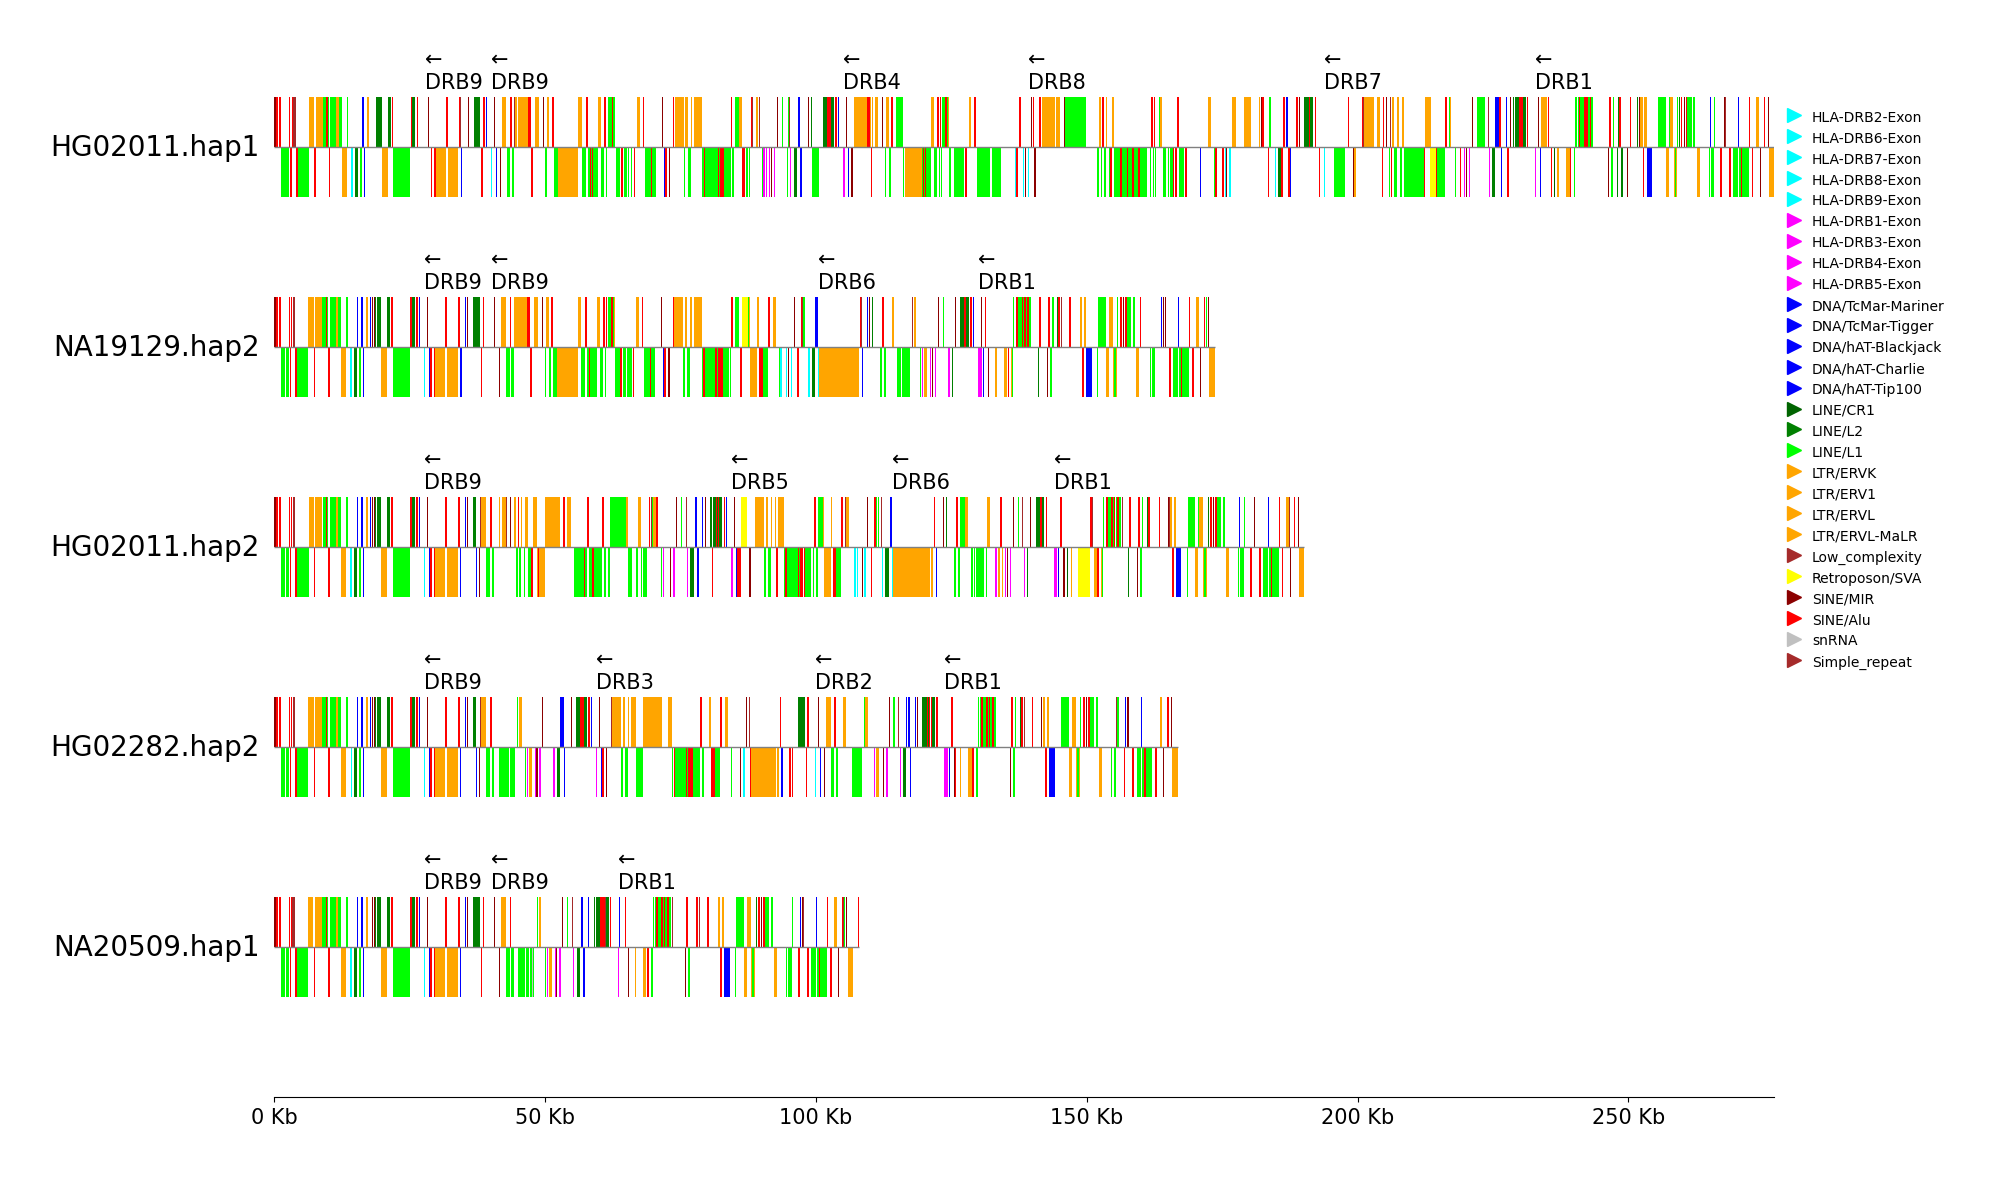

In [60]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

gv = GenomeViz(tick_style="axis")

for genome in myinterests:
    name, size, cds_list = genome_list[genome]["name"], genome_list[genome]["size"], genome_list[genome]["cds_list"]
    track = gv.add_feature_track(name, size)
    
    flag=1
    for idx, cds in enumerate(cds_list, 1):
        start, end, strand, mylabel, color  = cds
        
        if 'HLA' in str(mylabel) and '_1' in str(mylabel):
            track.add_feature(start, end, strand, label='←\n'+str(mylabel.split("HLA-")[1].split("_")[0]),facecolor=color,labelrotation=0, plotstyle="box", labelvpos="top", labelhpos="left", labelha="left")
        else:
            track.add_feature(start, end, strand, facecolor=color,labelrotation=0, plotstyle="box", labelvpos="top", labelhpos="center", labelha="center")
                
# Add Legends 
handles =[]
for color in ColorDict.keys():
    if 'HLA' in str(color):
        handles.append(Line2D([], [], marker=">", color=ColorDict[color], label=str(color)+"-Exon", ms=10, ls="none"))
    else:
        handles.append(Line2D([], [], marker=">", color=ColorDict[color], label=color, ms=10, ls="none"))

        
fig = gv.plotfig()
fig.subplots_adjust(wspace=0, hspace=1)
fig.legend(handles=handles, bbox_to_anchor=(1, 1))

#fig.savefig("/home/mark/Desktop/DRB1_DRB8_DRB4_DRB7_DRB9_5_percent_wPseudoGenes.pdf")
#fig.savefig("/home/mark/Desktop/DRB1_DRB8_DRB4_DRB7_DRB9_5_percent_wPseudoGenes.png")
#fig.savefig("/home/mark/Desktop/DRB1_DRB8_DRB4_DRB7_DRB9_5_percent_wPseudoGenes.jpeg")

#fig.savefig("/home/mark/Desktop/DRB1_DRB3_DRB9_DRB2_5_percent_wPseudoGenes.pdf")
#fig.savefig("/home/mark/Desktop/DRB1_DRB3_DRB9_DRB2_5_percent_wPseudoGenes.png")
#fig.savefig("/home/mark/Desktop/DRB1_DRB3_DRB9_DRB2_5_percent_wPseudoGenes.jpeg")

#fig.savefig("/home/mark/Desktop/DRB1_DRB9_5_percent_wPseudoGenes.pdf")
#fig.savefig("/home/mark/Desktop/DRB1_DRB9_5_percent_wPseudoGenes.png")
#fig.savefig("/home/mark/Desktop/DRB1_DRB9_5_percent_wPseudoGenes.jpeg")

#fig.savefig("/home/mark/Desktop/DRB1_DRB9_DRB5_DRB6_5_percent_wPseudoGenes.pdf")
#fig.savefig("/home/mark/Desktop/DRB1_DRB9_DRB5_DRB6_5_percent_wPseudoGenes.png")
#fig.savefig("/home/mark/Desktop/DRB1_DRB9_DRB5_DRB6_5_percent_wPseudoGenes.jpeg")

#fig.savefig("/home/mark/Desktop/DRB1_DRB9_DRB6_5_percent_wPseudoGenes.pdf")
#fig.savefig("/home/mark/Desktop/DRB1_DRB9_DRB6_5_percent_wPseudoGenes.png")
#fig.savefig("/home/mark/Desktop/DRB1_DRB9_DRB6_5_percent_wPseudoGenes.jpeg")

fig.savefig("/home/mark/Desktop/combined_50_percent_wPseudoGenes.pdf")
fig.savefig("/home/mark/Desktop/combined_50_percent_wPseudoGenes.png")
fig.savefig("/home/mark/Desktop/combined_50_percent_wPseudoGenes.jpeg")

In [240]:
test = DRB_DF[DRB_DF[5]=='HG02011.hap1'].copy()
for row in test[test[10].str.contains('HLA')].index:
    print([x for x in test.loc[row]])

['placeholder', 'placeholder1', 0.8, 0.0, 0.0, 'HG02011.hap1', 4374881, 4375147, 'placeholder', '-', '<-HLA-DRB9_2', 'HLA-DRB9', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'cyan', 10, 267]
['placeholder', 'placeholder1', 2.7, 0.0, 0.0, 'HG02011.hap1', 4388462, 4388536, 'placeholder', '-', '<-HLA-DRB9_1', 'HLA-DRB9', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'cyan', 13591, 75]
['placeholder', 'placeholder1', 2.6, 0.0, 0.0, 'HG02011.hap1', 4400773, 4400848, 'placeholder', '-', '<-HLA-DRB9_1', 'HLA-DRB9', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'cyan', 25902, 76]
['placeholder', 'placeholder1', 8.0, 0.0, 0.0, 'HG02011.hap1', 4431768, 4431842, 'placeholder', '-', '<-HLA-DRB9_1', 'HLA-DRB9', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placehol

In [157]:
4441157-4441444

-287

In [158]:
4479135-4479379

-244

In [159]:
4441157-4441444

-287

## Pull Exon 1 of DRB1

In [16]:
drb1 = DRB_DF1[DRB_DF1[10]=='<-HLA-DRB1_1'].copy()

In [20]:
import os
repeatDict={}
for file in os.listdir('/home/mark/Desktop/HLA/repeatmasker/plain_RepeatMasker/'):
    repeatDict[str(file.split(".")[0])+"."+str(file.split(".asm-")[1].split(".")[0])]='/home/mark/Desktop/HLA/repeatmasker/plain_RepeatMasker/'+str(file)
repeatDict2={x:repeatDict[x].split("/plain_RepeatMasker/")[1].split(".out")[0] for x in repeatDict.keys()}

In [21]:
repeatDict2

{'HG03807.hap2': 'HG03807.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG01114.hap1': 'HG01114.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'HG00171.hap2': 'HG00171.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'NA19434.hap2': 'NA19434.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG01352.hap2': 'HG01352.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG03371.hap2': 'HG03371.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG03683.hap1': 'HG03683.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'HG03683.hap2': 'HG03683.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG00733.hap1': 'HG00733.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'HG00514.hap2': 'HG00514.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG00732.hap1': 'HG00732.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'NA19036.hap1': 'NA19036.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'HG02818.unassigned': 'HG02818.vrk-ps-sseq.asm-unassigned.HLA.cleaned.fasta',
 'HG02587.hap1': 'HG02587.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'HG03732.hap1': 'HG03732.vrk-ps-sseq.asm-hap1.HLA

In [25]:
import pysam
#with open('/home/mark/Desktop/HLA/DRB/DRB_Exon1_Sequences_noAddition.fasta', 'a+') as file:
#    for row in drb1.index:
#        haplotype = drb1.at[row,5]
#        genomeFile = repeatDict2[haplotype]
#        start = int(drb1.at[row,6])
#        end = int(drb1.at[row,7])

#        file.write(pysam.faidx('/home/mark/Desktop/HLA/Globus/cleaned/'+str(genomeFile), str(haplotype)+":"+str(start)+"-"+str(end)))

In [30]:
exon1 = pd.read_csv('/home/mark/Desktop/HLA/DRB/Sequences/Exon1/Exon1_UTR_Locations.tsv', sep='\t', header=None)

In [45]:
exon1

,0,1,2,3,4,5,6,7,8
0,./chm13v2.0.gtf:chr6:28000000-34000000,IPD-IMGT/HLA-V3.52.0,UTR,4409230,4409303,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
1,./chm13v2.0.gtf:chr6:28000000-34000000,IPD-IMGT/HLA-V3.52.0,UTR,4422310,4422879,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
2,./HG00171.1.gtf:HG00171.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4492756,4493080,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
3,./HG00171.1.gtf:HG00171.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4508262,4508865,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
4,./HG00171.2.gtf:HG00171.vrk-ps-sseq_haplotype2...,IPD-IMGT/HLA-V3.52.0,UTR,4530528,4530563,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
...,...,...,...,...,...,...,...,...,...
225,./NA21487.2.gtf:NA21487.vrk-ps-sseq_haplotype2...,IPD-IMGT/HLA-V3.52.0,UTR,4520123,4520267,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
226,./NA24385.1.gtf:NA24385.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4404697,4404931,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
227,./NA24385.1.gtf:NA24385.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4417900,4418496,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
228,./NA24385.2.gtf:NA24385.vrk-ps-sseq_haplotype2...,IPD-IMGT/HLA-V3.52.0,UTR,4500558,4500593,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."


In [41]:
#Everything is antisense. Only look at the second UTR as that is the 5' UTR. 
set(exon1[6])

{'-'}

In [49]:
allLengths=[]
for sample in set(exon1[0]):
    print(sample)
    tempDF = exon1[exon1[0]==sample].sort_values(by=[3]).copy()
    tempList=[]
    for x,y in zip (tempDF[3], tempDF[4]):
        tempList.append(int(y)-int(x))
    print(tempList[1])
    allLengths.append(tempList[1])

./HG02282.1.gtf:HG02282.vrk-ps-sseq_haplotype1-0000021_HLA_REV-137822144:143836293
606
./HG03683.1.gtf:HG03683.vrk-ps-sseq_haplotype1-0000032_HLA_FWD-28166010:34299141
603
./NA19434.2.gtf:NA19434.vrk-ps-sseq_haplotype2-0000127_HLA_REV-138143796:144217985
144
./HG02818.2.gtf:HG02818.vrk-ps-sseq_haplotype2-0000121_HLA_FWD-28111094:34107672
561
./NA21487.2.gtf:NA21487.vrk-ps-sseq_haplotype2-0000147_HLA_REV-137163472:143272208
144
./HG02587.2.gtf:HG02587.vrk-ps-sseq_haplotype2-0000072_HLA_FWD-27888843:33904538
50
./HG01505.2.gtf:HG01505.vrk-ps-sseq_haplotype2-0000147_HLA_FWD-28111072:34127689
569
./HG01457.2.gtf:HG01457.vrk-ps-sseq_haplotype2-0000108_HLA_FWD-28106879:34270394
594
./HG03248.2.gtf:HG03248.vrk-ps-sseq_haplotype2-0000148_HLA_FWD-28152773:34392386
144
./HG00732.1.gtf:HG00732.vrk-ps-sseq_haplotype1-0000026_HLA_FWD-28139661:34101186
549
./HG01890.2.gtf:HG01890.vrk-ps-sseq_haplotype2-0000060_HLA_FWD-28162931:34170981
597
./HG02769.2.gtf:HG02769.vrk-ps-sseq_haplotype2-0000196_HLA_F

In [50]:
tempDF.sort_values(by=[3])

,0,1,2,3,4,5,6,7,8
198,./NA19705.1.gtf:NA19705.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4475602,4475675,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
199,./NA19705.1.gtf:NA19705.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4488678,4489239,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."


115


(array([ 6., 38.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 64.]),
 array([ 50. , 105.6, 161.2, 216.8, 272.4, 328. , 383.6, 439.2, 494.8,
        550.4, 606. ]),
 <BarContainer object of 10 artists>)

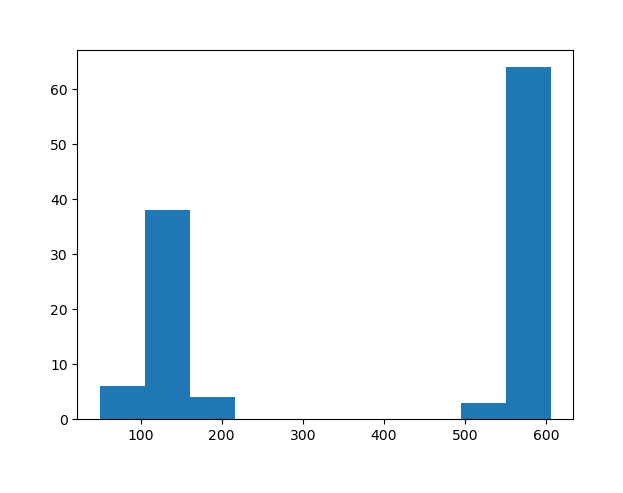

In [51]:
print(len(allLengths))
plt.hist(allLengths)

## Start Looking for Pseudogenes

In [12]:
import os
import ast
sampleCoordinates ={}
for file in os.listdir('/home/mark/Desktop/HLA/HengLi/Runs/'):
    sampleCoordinates[str(file.split(".")[0])+".hap"+str(file.split(".")[1])]={}
    tempDF = pd.read_csv('/home/mark/Desktop/HLA/HengLi/Runs/'+str(file),sep='\t', comment='#', header=None)
    tempDF2 = tempDF[tempDF[2]=='gene'].copy()
    for row in tempDF2.index:
        geneName = ast.literal_eval(tempDF2.at[row,8].split("gene_name")[1].split(";")[0])
        coordinates = str(tempDF2.at[row,3])+"-"+str(tempDF2.at[row,4])
        sampleCoordinates[str(file.split(".")[0])+".hap"+str(file.split(".")[1])][coordinates]=geneName

In [13]:
sampleCoordinates['HG03683.hap1']

{'1565941-1569475': 'HLA-F',
 '1634432-1636334': 'HLA-V',
 '1642533-1645463': 'HLA-P',
 '1670123-1673260': 'HLA-G',
 '1723835-1727326': 'HLA-H',
 '1732238-1734723': 'HLA-T',
 '1762386-1765942': 'HLA-K',
 '1768523-1769108': 'HLA-U',
 '1776605-1780122': 'HLA-A',
 '1790480-1793420': 'HLA-W',
 '1840639-1844182': 'HLA-J',
 '2094776-2098541': 'HLA-L',
 '2186598-2187232': 'HLA-N',
 '2327068-2330889': 'HLA-E',
 '3105820-3110123': 'HLA-C',
 '3190196-3194280': 'HLA-B',
 '3218624-3219497': 'HLA-S',
 '3239916-3252067': 'MICA',
 '3335068-3346821': 'MICB',
 '3819031-3839654': 'C4AL',
 '3851769-3872392': 'C4BL',
 '3884507-3905130': 'C4BL',
 '4309042-4314752': 'HLA-DRA',
 '4405018-4420485': 'HLA-DRB4',
 '4534549-4550668': 'HLA-DRB1',
 '4600644-4607046': 'HLA-DQA1',
 '4620872-4627997': 'HLA-DQB1',
 '4706130-4711984': 'HLA-DQA2',
 '4721019-4728384': 'HLA-DQB2',
 '4776242-4781027': 'HLA-DOB',
 '4791996-4802609': 'TAP2',
 '4808540-4817809': 'TAP1',
 '4897923-4904662': 'HLA-DMB',
 '4911908-4916920': 'HLA-D

In [14]:
geneCountDF = pd.read_csv("/home/mark/Desktop/HLA/allGeneLocations/HLA_300Gene_locationDataframe_ReWork2024_03-27-2024.csv").set_index("Unnamed: 0")

In [18]:
geneCountDF.drop(['hg38_hap4','hg38_hap5'], inplace=True)

In [19]:
#DRB7 = 5 exons
#DRB6 = 6 exons
#DRB2 = 4 exons
#DRB8 = 4 exons
#DRB9 = 2 exons
drbList =['HLA-DRB2', 'HLA-DRB6', 'HLA-DRB7', 'HLA-DRB8', 'HLA-DRB9']

In [20]:
pseudoDict={}

for row in geneCountDF.index:
    print(row)
    pseudoDict[row]={}
    haplotype = str(row).replace("_",'.')
    
    for drb in drbList:
        
        tempDict = ast.literal_eval(geneCountDF.at[row, drb])
        
        if tempDict['Count']>0:
            
            if tempDict['Count'] == 1:
                
                #Look at the best copy only
                tempList=[]
                for x in ast.literal_eval(geneCountDF.at[row, drb])['BestCopy']:
                    tempList.append(x)
                    
                tempDF = pd.DataFrame(data=tempList)
                tempDF[5] = tempDF[5].astype(int)
                tempDF[6] = tempDF[6].astype(int)
                
                di={0:'+', 1:'C'}
                tempDF2 = tempDF.sort_values(by=5).copy()
                tempDF2.replace({7: di}, inplace=True)
                
                tempList2 = []
                for rowy in tempDF2.index:
                    tempList2.append([rowx for rowx in tempDF2.loc[rowy]])
                
                count = len(tempDF2)
                start = min(tempDF2[5])
                end =  max(tempDF2[6])
                
                totalFlags=0
                
                for x,y in zip(tempDF2[5], tempDF2[6]):
                    print(x,y)
                    
                    flag =0
                    for gene in sampleCoordinates[haplotype]:
                        genestart= int(gene.split("-")[0])
                        geneend= int(gene.split("-")[1])
                        
                        if x > geneend or y < genestart:
                            continue
                        else:
                            if (x>=genestart and x<=geneend) or (y>=genestart and y<=geneend):
                                flag+=1
                            else:
                                continue
                        
                    if flag>0:
                        totalFlags+=1
                    else:
                        continue
                        
                
                pseudoDict[row][drb]={'Designation':'Best_Copy', 'Start':start, 'End':end, 'Flag_Percentage':totalFlags/count, 'Best_Copy_Exons':tempList2}
                
                
            else:
                
                #Look at the best copy First
                tempList=[]
                for x in ast.literal_eval(geneCountDF.at[row, drb])['BestCopy']:
                    tempList.append(x)
                    
                tempDF = pd.DataFrame(data=tempList)
                tempDF[5] = tempDF[5].astype(int)
                tempDF[6] = tempDF[6].astype(int)
                
                di={0:'+', 1:'C'}
                tempDF2 = tempDF.sort_values(by=5).copy()
                tempDF2.replace({7: di}, inplace=True)
                
                tempList2 = []
                for rowy in tempDF2.index:
                    tempList2.append([rowx for rowx in tempDF2.loc[rowy]])

                count = len(tempDF2)
                start = int(min(tempDF2[5]))
                end =  int(max(tempDF2[6]))
                
                totalFlags=0
                for x,y in zip(tempDF2[5], tempDF2[6]):
                    print(x,y)
                    
                    flag =0
                    for gene in sampleCoordinates[haplotype]:
                        genestart= int(gene.split("-")[0])
                        geneend= int(gene.split("-")[1])
                        
                        if x > geneend or y < genestart:
                            continue
                        else:
                            if (x>=genestart and x<=geneend) or (y>=genestart and y<=geneend):
                                flag+=1
                            else:
                                continue
                        
                    if flag>0:
                        totalFlags+=1
                    else:
                        continue
                        
                
                pseudoDict[row][drb]={'Designation':'Best_Copy', 'Start':start, 'End':end, 'Flag_Percentage':totalFlags/count, 'Best_Copy_Exons':tempList2}
                            
            
        else:
            pseudoDict[row][drb]='Not_Present'

HG00512_hap1
4315085 4315129
4315582 4315690
4316394 4316675
4327162 4327261
4314271 4314310
4315085 4315129
4315582 4315690
4316394 4316675
4281494 4281760
4295101 4295176
HG02282_hap2
4392244 4392292
4392744 4392854
4393604 4393865
4406927 4407032
4353858 4353897
4354672 4354720
4355169 4355277
4355963 4356244
4321095 4321361
4334702 4334777
HG01573_hap2
4403321 4403368
4403819 4403927
4404634 4404915
4417484 4417583
4487240 4487290
4488039 4488149
4488852 4489135
4497230 4497493
4506323 4506422
4449304 4449343
4449938 4449986
4450751 4450861
4451560 4451841
4326656 4326922
4340237 4340311
4352548 4352623
4383541 4383615
HG00514_hap1
4347395 4347439
4347892 4348000
4348704 4348985
4359472 4359571
4346581 4346620
4347395 4347439
4347892 4348000
4348704 4348985
4313803 4314069
4327411 4327486
hg38_hap3
3851769 3851816
3852267 3852375
3853082 3853363
3865934 3866033
3935637 3935687
3936436 3936546
3937249 3937532
3945627 3945890
3954717 3954816
3897750 3897789
3898384 3898432
3899197 38

4455457 4455496
4456293 4456343
4456804 4456914
4457616 4457892
4349771 4350037
4363380 4363455
4375680 4375755
4406649 4406723
HG02666_hap2
4481941 4481989
4482441 4482551
4483274 4483535
4496255 4496356
4443550 4443589
4444364 4444412
4444861 4444969
4445656 4445937
4410788 4411054
4424395 4424470
HG00513_hap2
4316154 4316198
4316651 4316759
4317463 4317744
4328231 4328330
4315340 4315379
4316154 4316198
4316651 4316759
4317463 4317744
4282563 4282829
4296170 4296245
HG00268_hap1
4410860 4410907
4411359 4411469
4412170 4412451
4420252 4420351
4383325 4383684
4383988 4384036
4384468 4384578
4385302 4385583
4388528 4388798
4390428 4390614
4397695 4397873
4410858 4410908
4411359 4411469
4412170 4412451
4414719 4414987
4420252 4420351
4409702 4409741
4410860 4410908
4411359 4411469
4412170 4412451
4290432 4290698
4304036 4304111
NA19836_hap1
4323141 4323189
4323641 4323751
4324501 4324762
4337485 4337590
4284765 4284804
4285579 4285627
4286076 4286184
4286870 4287151
4248345 4248611
4261

4292987 4293253
4306592 4306667
NA19836_hap2
4460772 4460813
4461283 4461393
4462095 4462371
4470148 4470247
4433591 4433950
4434253 4434301
4434737 4434847
4435550 4435829
4438771 4439040
4440665 4440849
4447919 4448097
4460770 4460820
4461283 4461393
4462095 4462371
4464607 4464875
4470148 4470247
4459936 4459975
4460772 4460822
4461283 4461393
4462095 4462371
4354251 4354517
4367860 4367935
4380160 4380235
4411130 4411204
HG03009_hap2
4394094 4394142
4394594 4394704
4395424 4395685
4408412 4408517
4355704 4355743
4356518 4356566
4357015 4357125
4357810 4358091
4319262 4319528
4332888 4332962
4345172 4345246
HG04217_hap2
4437471 4437519
4437971 4438081
4438801 4439062
4451788 4451893
4399081 4399120
4399895 4399943
4400392 4400502
4401187 4401468
4362640 4362906
4376264 4376338
4388549 4388623
NA19705_hap1
4450062 4450110
4450562 4450672
4451422 4451683
4464743 4464848
4411674 4411713
4412488 4412536
4412985 4413093
4413779 4414060
4378912 4379178
4392518 4392593
HG01505_hap2
4413379

4510299 4510338
4510934 4510982
4511747 4511857
4512556 4512837
4387319 4387585
4400902 4400976
4413207 4413282
4444204 4444278


In [23]:
pseudoDict['hg38_hap1']

{'HLA-DRB2': {'Designation': 'Best_Copy',
  'Start': 4070128,
  'End': 4079623,
  'Flag_Percentage': 1.0,
  'Best_Copy_Exons': [[35427,
    6.2,
    0.0,
    0.0,
    'hg38.hap1',
    4070128,
    4070175,
    'C',
    'HLA-DRB2-201_UP_IN-25_EXON_4',
    0,
    49,
    2,
    'HLA-DRB2-201',
    0.9591836734693876,
    'Not Gene',
    'HLA-DRB2'],
   [35428,
    3.6,
    0.0,
    0.0,
    'hg38.hap1',
    4070627,
    4070737,
    'C',
    'HLA-DRB2-201_UP_EXON_3',
    0,
    111,
    1,
    'HLA-DRB2-201',
    0.990990990990991,
    'Gene',
    'HLA-DRB2'],
   [35429,
    8.4,
    0.0,
    7.6,
    'hg38.hap1',
    4071438,
    4071719,
    'C',
    'HLA-DRB2-201_UP_EXON_2',
    0,
    262,
    1,
    'HLA-DRB2-201',
    0.9961832061068704,
    'Not Gene',
    'HLA-DRB2'],
   [35430,
    11.0,
    4.0,
    0.0,
    'hg38.hap1',
    4079524,
    4079623,
    'C',
    'HLA-DRB2-201_UP_EXON_1',
    2,
    104,
    1,
    'HLA-DRB2-201',
    0.9716981132075472,
    'Not Gene',
    'HLA-DR

In [30]:
#Run Twice to fill out the heatmap
immunoPseudo=[]
mp = []
for haplotype in pseudoDict.keys():
    tempList=[]
    for drb in pseudoDict[haplotype]:
        if pseudoDict[haplotype][drb]=='Not_Present':
            continue
        else:
            if float(pseudoDict[haplotype][drb]['Flag_Percentage'])==0.0:
                tempList.append(drb)
            else:
                continue
    
    hap = haplotype.replace("_",".")
    tempDF = DRB_DF[DRB_DF[5]==hap].copy()
    mp.append('_'.join(tempList))
    newList =[ast.literal_eval(x) for x in set(tempDF[tempDF[10].str.contains('HLA', regex=True)][18])]
    immunoPseudo.append('_'.join(newList))
    heatmap.at['_'.join(tempList), '_'.join(newList)]+=1
    if '_'.join(newList) == 'HLA-DRB1_HLA-DRB5' and '_'.join(tempList) == 'HLA-DRB6_HLA-DRB9':
        print(haplotype)
    else:
        pass
    print(haplotype, 'Missing Pseudogene: '+str(tempList), '\n','ImmunoAnnot: '+str(set(tempDF[tempDF[10].str.contains('HLA', regex=True)][18])),'\n')

NameError: name 'DRB_DF' is not defined

In [174]:
heatmap = pd.DataFrame(index=[x for x in set(mp)], columns=[y for y in set(immunoPseudo)]).fillna(0)
heatmap

,HLA-DRB1_HLA-DRB3,HLA-DRB1_HLA-DRB4,HLA-DRB1_HLA-DRB5,HLA-DRB1
HLA-DRB2_HLA-DRB6_HLA-DRB9,0,0,0,0
HLA-DRB7_HLA-DRB8_HLA-DRB9,0,0,0,0
HLA-DRB6_HLA-DRB9,0,0,0,0
HLA-DRB2_HLA-DRB9,0,0,0,0
HLA-DRB9,0,0,0,0


<Axes: >

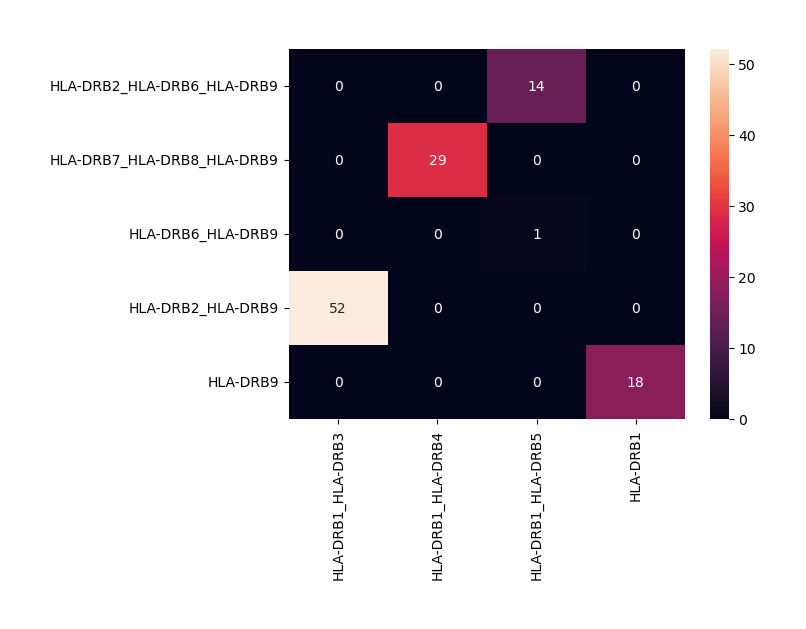

In [176]:
import seaborn as sns

sns.heatmap(data=heatmap, annot=True)

In [181]:
pseudoDict

{'HG02282_hap2': {'HLA-DRB2': {'Designation': 'Best_Copy',
   'Start': 4392244,
   'End': 4407032,
   'Flag_Percentage': 0.0,
   'Best_Copy_Exons': [[100729,
     0.0,
     0.0,
     0.0,
     'HG02282.hap2',
     4392244,
     4392292,
     'C',
     'HLA-DRB2-201_UP_IN-25_EXON_4',
     0,
     49,
     1,
     'HLA-DRB2-201',
     0.979591836734694,
     'Gene',
     'HLA-DRB2'],
    [100730,
     0.0,
     0.0,
     0.0,
     'HG02282.hap2',
     4392744,
     4392854,
     'C',
     'HLA-DRB2-201_UP_EXON_3',
     0,
     111,
     1,
     'HLA-DRB2-201',
     0.990990990990991,
     'Gene',
     'HLA-DRB2'],
    [100731,
     0.0,
     0.0,
     0.0,
     'HG02282.hap2',
     4393604,
     4393865,
     'C',
     'HLA-DRB2-201_UP_EXON_2',
     0,
     262,
     1,
     'HLA-DRB2-201',
     0.9961832061068704,
     'Gene',
     'HLA-DRB2'],
    [100732,
     14.6,
     0.0,
     0.0,
     'HG02282.hap2',
     4394376,
     4394416,
     'C',
     'HLA-DRB2-201_UP_EXON_2',
     0,
  

In [270]:
pseudoDict['NA18534_hap1']['HLA-DRB9']

{'Designation': 'Best_Copy',
 'Start': 4331442,
 'End': 4388403,
 'Flag_Percentage': 0.0,
 'Best_Copy_Exons': [[31990,
   0.8,
   0.0,
   0.0,
   'NA18534.hap1',
   4331442,
   4331708,
   'C',
   'HLA-DRB9-201_UP_EXON_2',
   0,
   267,
   1,
   'HLA-DRB9-201',
   0.99625468164794,
   'Gene',
   'HLA-DRB9'],
  [31991,
   2.7,
   0.0,
   0.0,
   'NA18534.hap1',
   4345023,
   4345097,
   'C',
   'HLA-DRB9-201_UP_EXON_1',
   1,
   75,
   1,
   'HLA-DRB9-201',
   0.9736842105263158,
   'Gene',
   'HLA-DRB9'],
  [31992,
   2.6,
   0.0,
   0.0,
   'NA18534.hap1',
   4357334,
   4357409,
   'C',
   'HLA-DRB9-201_UP_EXON_1',
   0,
   76,
   1,
   'HLA-DRB9-201',
   0.986842105263158,
   'Gene',
   'HLA-DRB9'],
  [31993,
   8.0,
   0.0,
   0.0,
   'NA18534.hap1',
   4388329,
   4388403,
   'C',
   'HLA-DRB9-201_UP_EXON_1',
   1,
   75,
   1,
   'HLA-DRB9-201',
   0.9736842105263158,
   'Not Gene',
   'HLA-DRB9']]}

In [32]:
PseudoList=[]
for haplotype in pseudoDict.keys():
    for drb in pseudoDict[haplotype]:
        if pseudoDict[haplotype][drb] == 'Not_Present':
            continue
        else:
            if float(pseudoDict[haplotype][drb]['Flag_Percentage']) == 0.0:
                for exon in pseudoDict[haplotype][drb]['Best_Copy_Exons']:
                    PseudoList.append(exon)
            else:
                continue

In [33]:
pDF = pd.DataFrame(data=PseudoList)

In [34]:
pDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,41136,0.0,0.0,0.0,HG00512.hap1,4281494,4281760,C,HLA-DRB9-201_UP_EXON_2,0,267,1,HLA-DRB9-201,0.996255,Gene,HLA-DRB9
1,41137,0.0,0.0,0.0,HG00512.hap1,4295101,4295176,C,HLA-DRB9-201_UP_EXON_1,0,76,1,HLA-DRB9-201,0.986842,Gene,HLA-DRB9
2,41457,0.0,0.0,0.0,HG02282.hap2,4392244,4392292,C,HLA-DRB2-201_UP_IN-25_EXON_4,0,49,1,HLA-DRB2-201,0.979592,Gene,HLA-DRB2
3,41458,0.0,0.0,0.0,HG02282.hap2,4392744,4392854,C,HLA-DRB2-201_UP_EXON_3,0,111,1,HLA-DRB2-201,0.990991,Gene,HLA-DRB2
4,41459,0.0,0.0,0.0,HG02282.hap2,4393604,4393865,C,HLA-DRB2-201_UP_EXON_2,0,262,1,HLA-DRB2-201,0.996183,Gene,HLA-DRB2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,42155,0.3,0.0,0.0,NA21487.hap1,4512556,4512837,C,HLA-DRB8-201_UP_EXON_1,0,282,1,HLA-DRB8-201,0.996454,Gene,HLA-DRB8
1137,42177,0.8,0.0,0.0,NA21487.hap1,4387319,4387585,C,HLA-DRB9-201_UP_EXON_2,0,267,1,HLA-DRB9-201,0.996255,Gene,HLA-DRB9
1138,42178,2.7,0.0,0.0,NA21487.hap1,4400902,4400976,C,HLA-DRB9-201_UP_EXON_1,1,75,1,HLA-DRB9-201,0.973684,Gene,HLA-DRB9
1139,42179,2.6,0.0,0.0,NA21487.hap1,4413207,4413282,C,HLA-DRB9-201_UP_EXON_1,0,76,1,HLA-DRB9-201,0.986842,Gene,HLA-DRB9


In [35]:
#pDF.to_csv('/home/mark/Desktop/HLA/DRB/DRB_PseudoGene_RM_ReWork2024-03-27-2024.csv')